In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
from behav_viz.utils import plot_utils as pu

sns.set_context("talk")

# V1 vs V2 growth Visuals

> Goal: To make example growth plots for explaining the differences between the V1 and V2 growth curriculums


Here is an example image. will plan to work with these two animals and go from there.

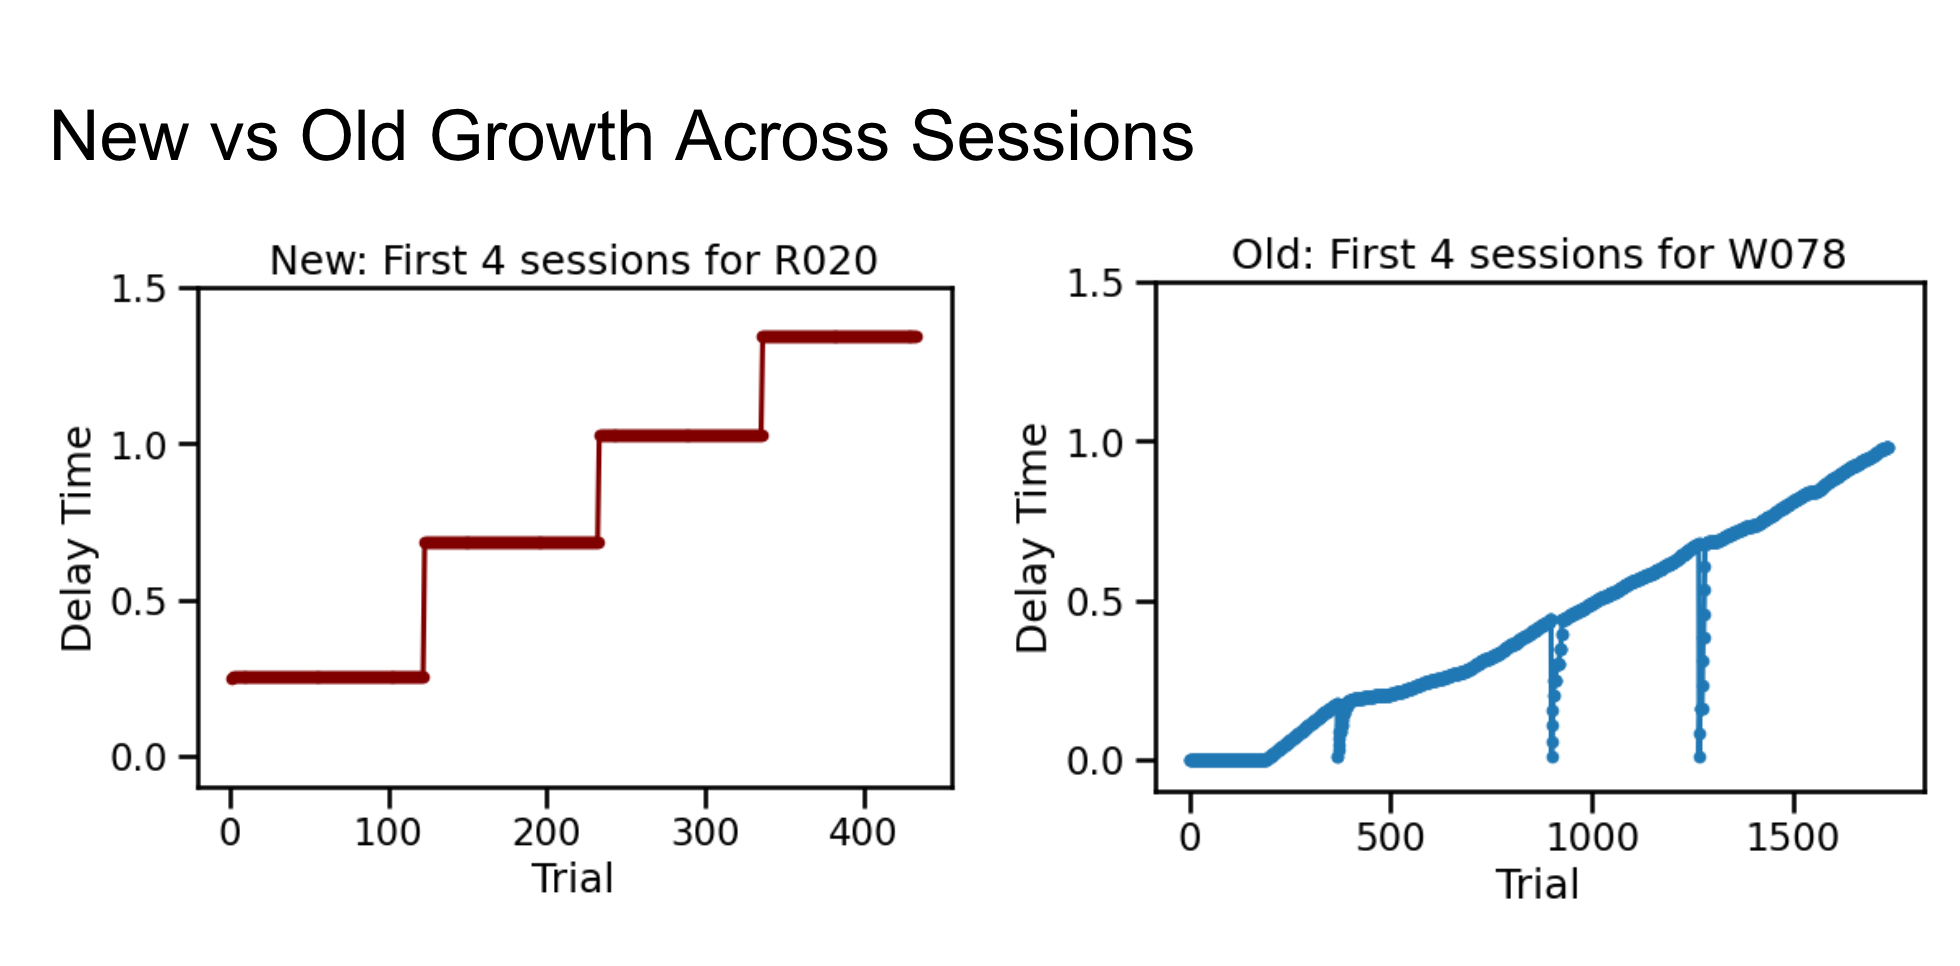

## 1. V1

### 1.1 Load in V1 dataa


In [123]:
animal = "R042"

tdf = ingest.create_trials_df.create_trials_df_from_dj([animal], date_min="2024-07-30")

animal_id R042
Fetched 26 dates from Sessions table from 2024-07-30 to 2024-08-24 for R042



In [124]:
tdf = viz.df_preperation.compute_days_relative_to_stage(
    tdf.query("stage <=7").copy(), stage=5
)
tdf["total_trials"] = range(len(tdf))

tdf.query("days_relative_to_stage_5 <5")

,trial,animal_id,date,sess_id,protocol,result,hits,violations,temperror,hit_rate,...,ab_beta,ab_tau,exp_tau,exp_min,exp_max,sound_pair,min_time_to_spoke,datetime_col,days_relative_to_stage_5,total_trials
0,1,R042,2024-07-30,964861,FixationGrower,1,1,0,0,0.00,...,0.0,30.0,1.2,1.0,2.0,"nan, nan",1.3443,2024-07-30,0,0
1,2,R042,2024-07-30,964861,FixationGrower,1,1,0,0,1.00,...,0.1,30.0,1.2,1.0,2.0,"nan, nan",1.0260,2024-07-30,0,1
2,3,R042,2024-07-30,964861,FixationGrower,1,1,0,0,1.00,...,0.2,30.0,1.2,1.0,2.0,"nan, nan",1.5618,2024-07-30,0,2
3,4,R042,2024-07-30,964861,FixationGrower,1,1,0,0,1.00,...,0.3,30.0,1.2,1.0,2.0,"nan, nan",1.9620,2024-07-30,0,3
4,5,R042,2024-07-30,964861,FixationGrower,1,1,0,0,1.00,...,0.4,30.0,1.2,1.0,2.0,"nan, nan",1.2364,2024-07-30,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,462,R042,2024-08-03,965260,FixationGrower,1,1,0,0,0.96,...,3.0,30.0,1.2,1.0,2.0,"nan, nan",2.2073,2024-08-03,4,2413
2414,463,R042,2024-08-03,965260,FixationGrower,1,1,0,0,0.96,...,3.0,30.0,1.2,1.0,2.0,"nan, nan",1.8286,2024-08-03,4,2414
2415,464,R042,2024-08-03,965260,FixationGrower,1,1,0,0,0.96,...,3.0,30.0,1.2,1.0,2.0,"nan, nan",1.8079,2024-08-03,4,2415
2416,465,R042,2024-08-03,965260,FixationGrower,1,1,0,0,0.96,...,3.0,30.0,1.2,1.0,2.0,"nan, nan",1.8266,2024-08-03,4,2416


### 1.2 Plotting the delay over time

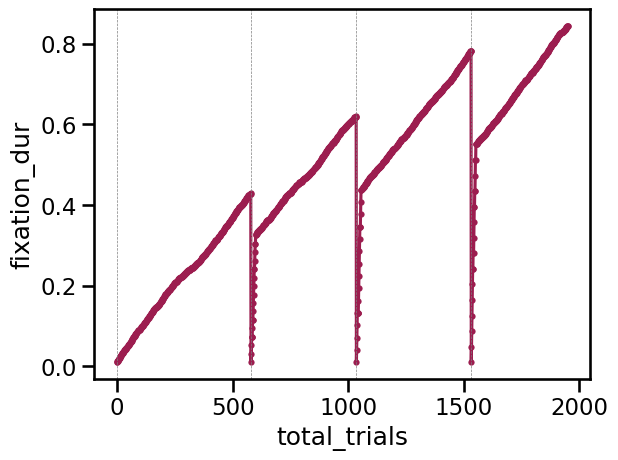

In [139]:
plot_df = tdf.query("days_relative_to_stage_5 <4")
sns.lineplot(
    data=plot_df,
    x="total_trials",
    y="fixation_dur",
    color=pu.ALPHA_V1_color,
    marker=".",
    markeredgecolor="none",
)

# Find the unique session start points
session_starts = plot_df.groupby("sess_id")["total_trials"].min() - 1

# Plot a vertical line at the start of each new session
for session_start in session_starts:
    plt.axvline(x=session_start, color="gray", linestyle="--", lw=0.5)

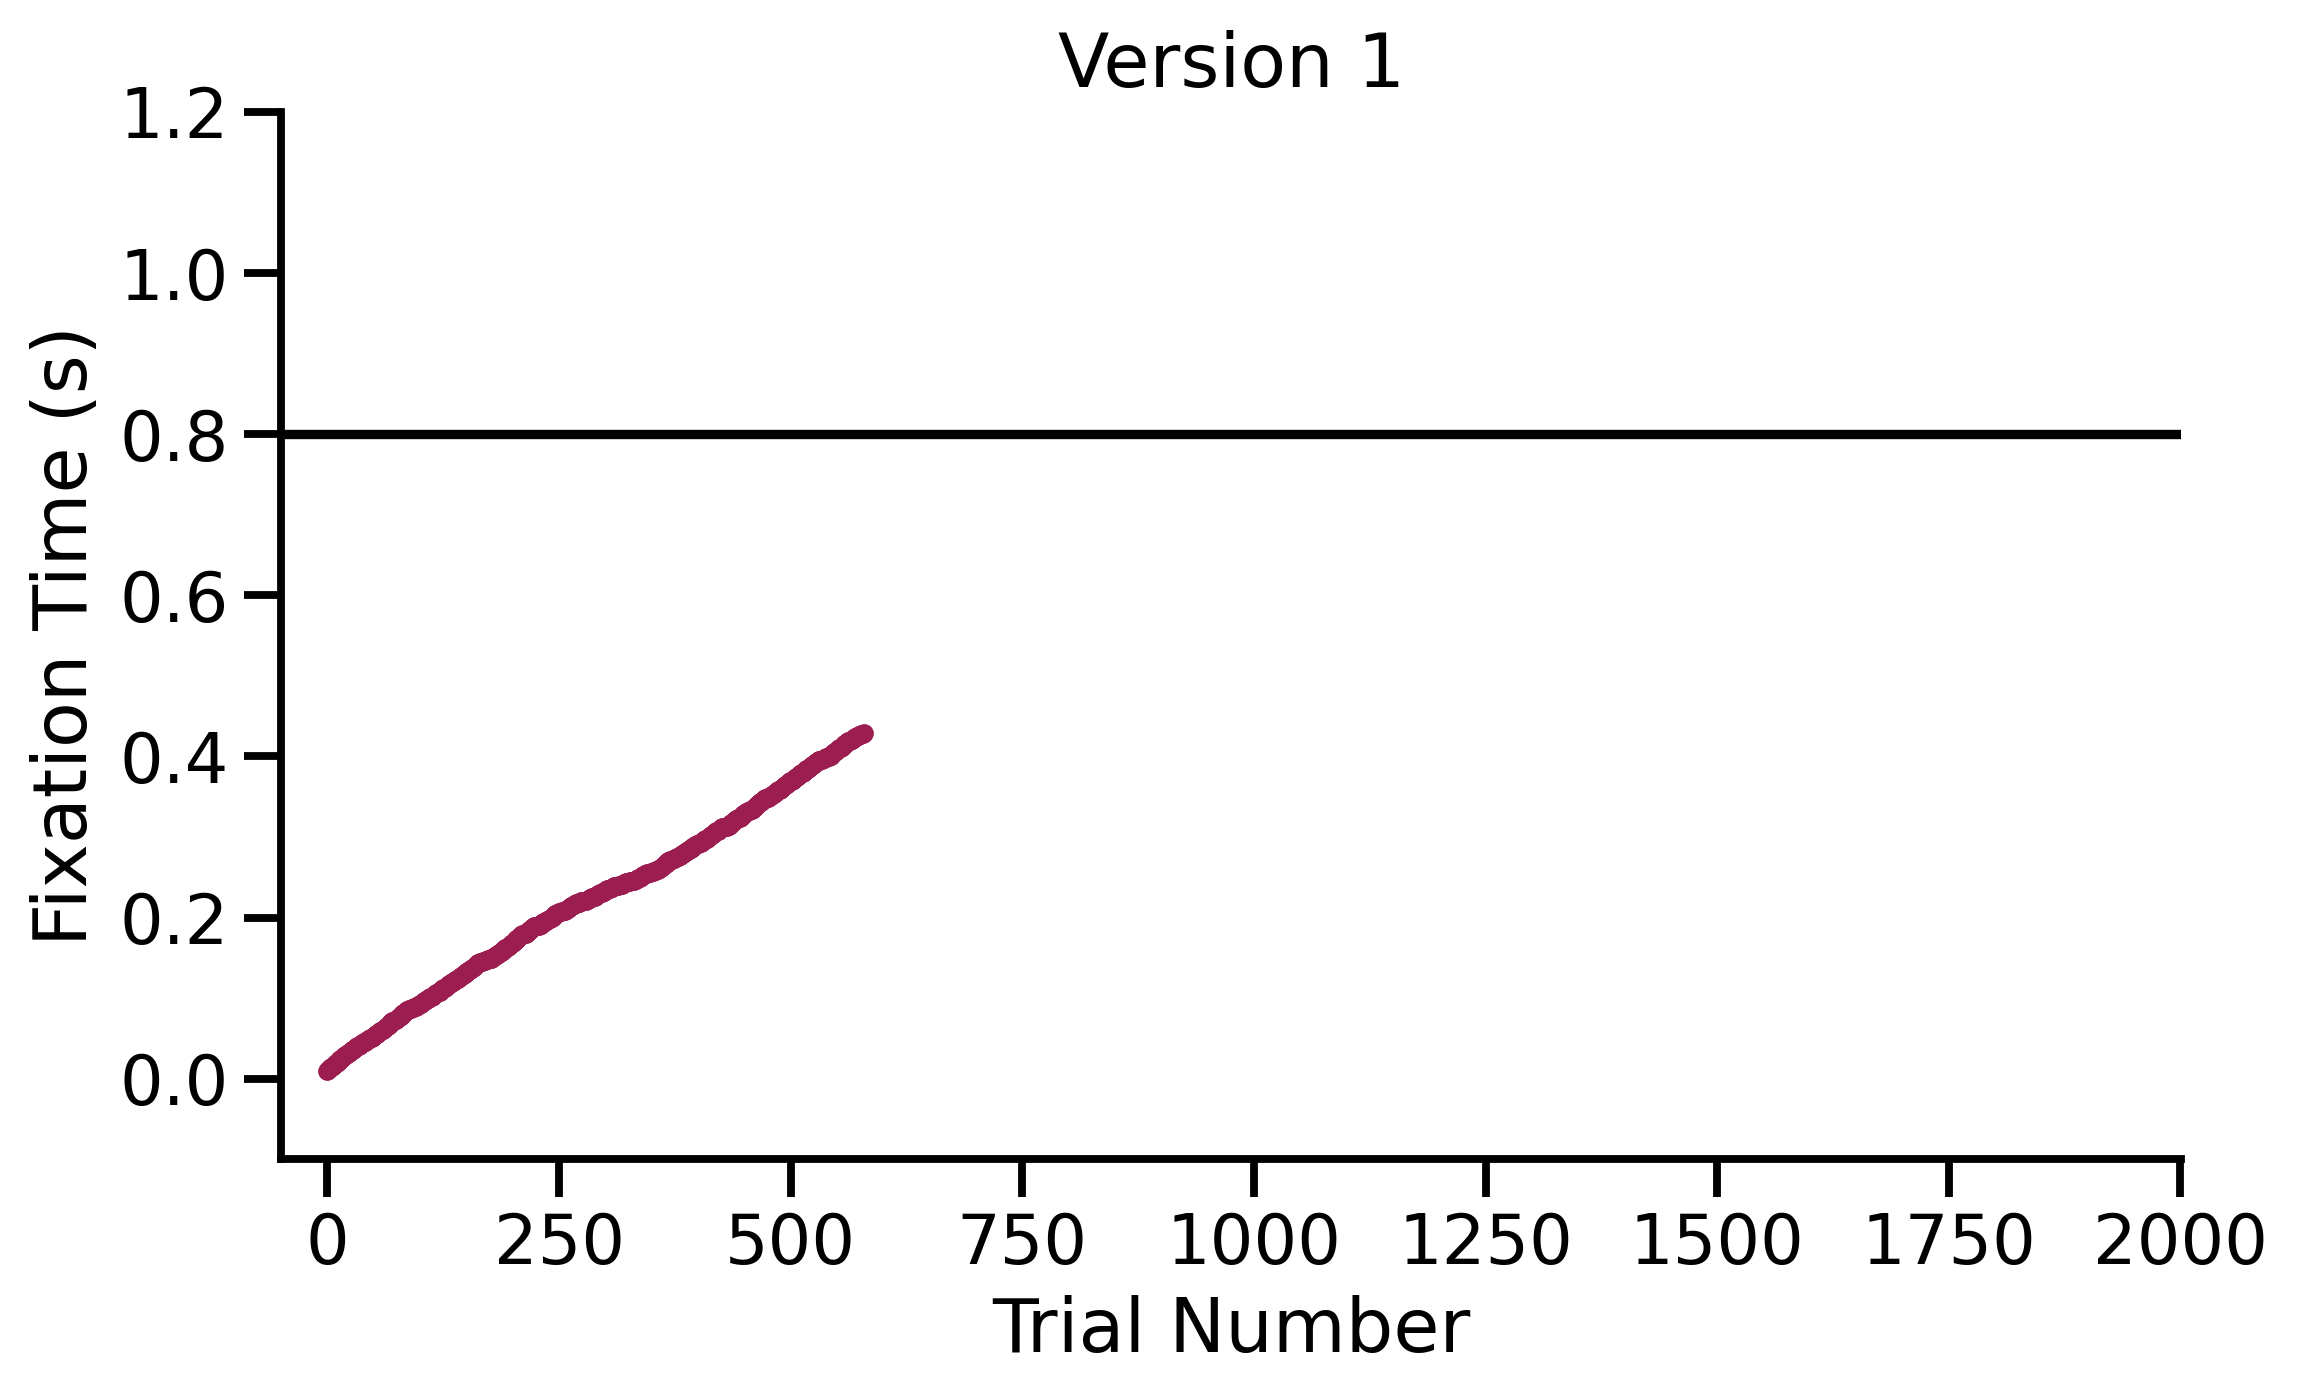

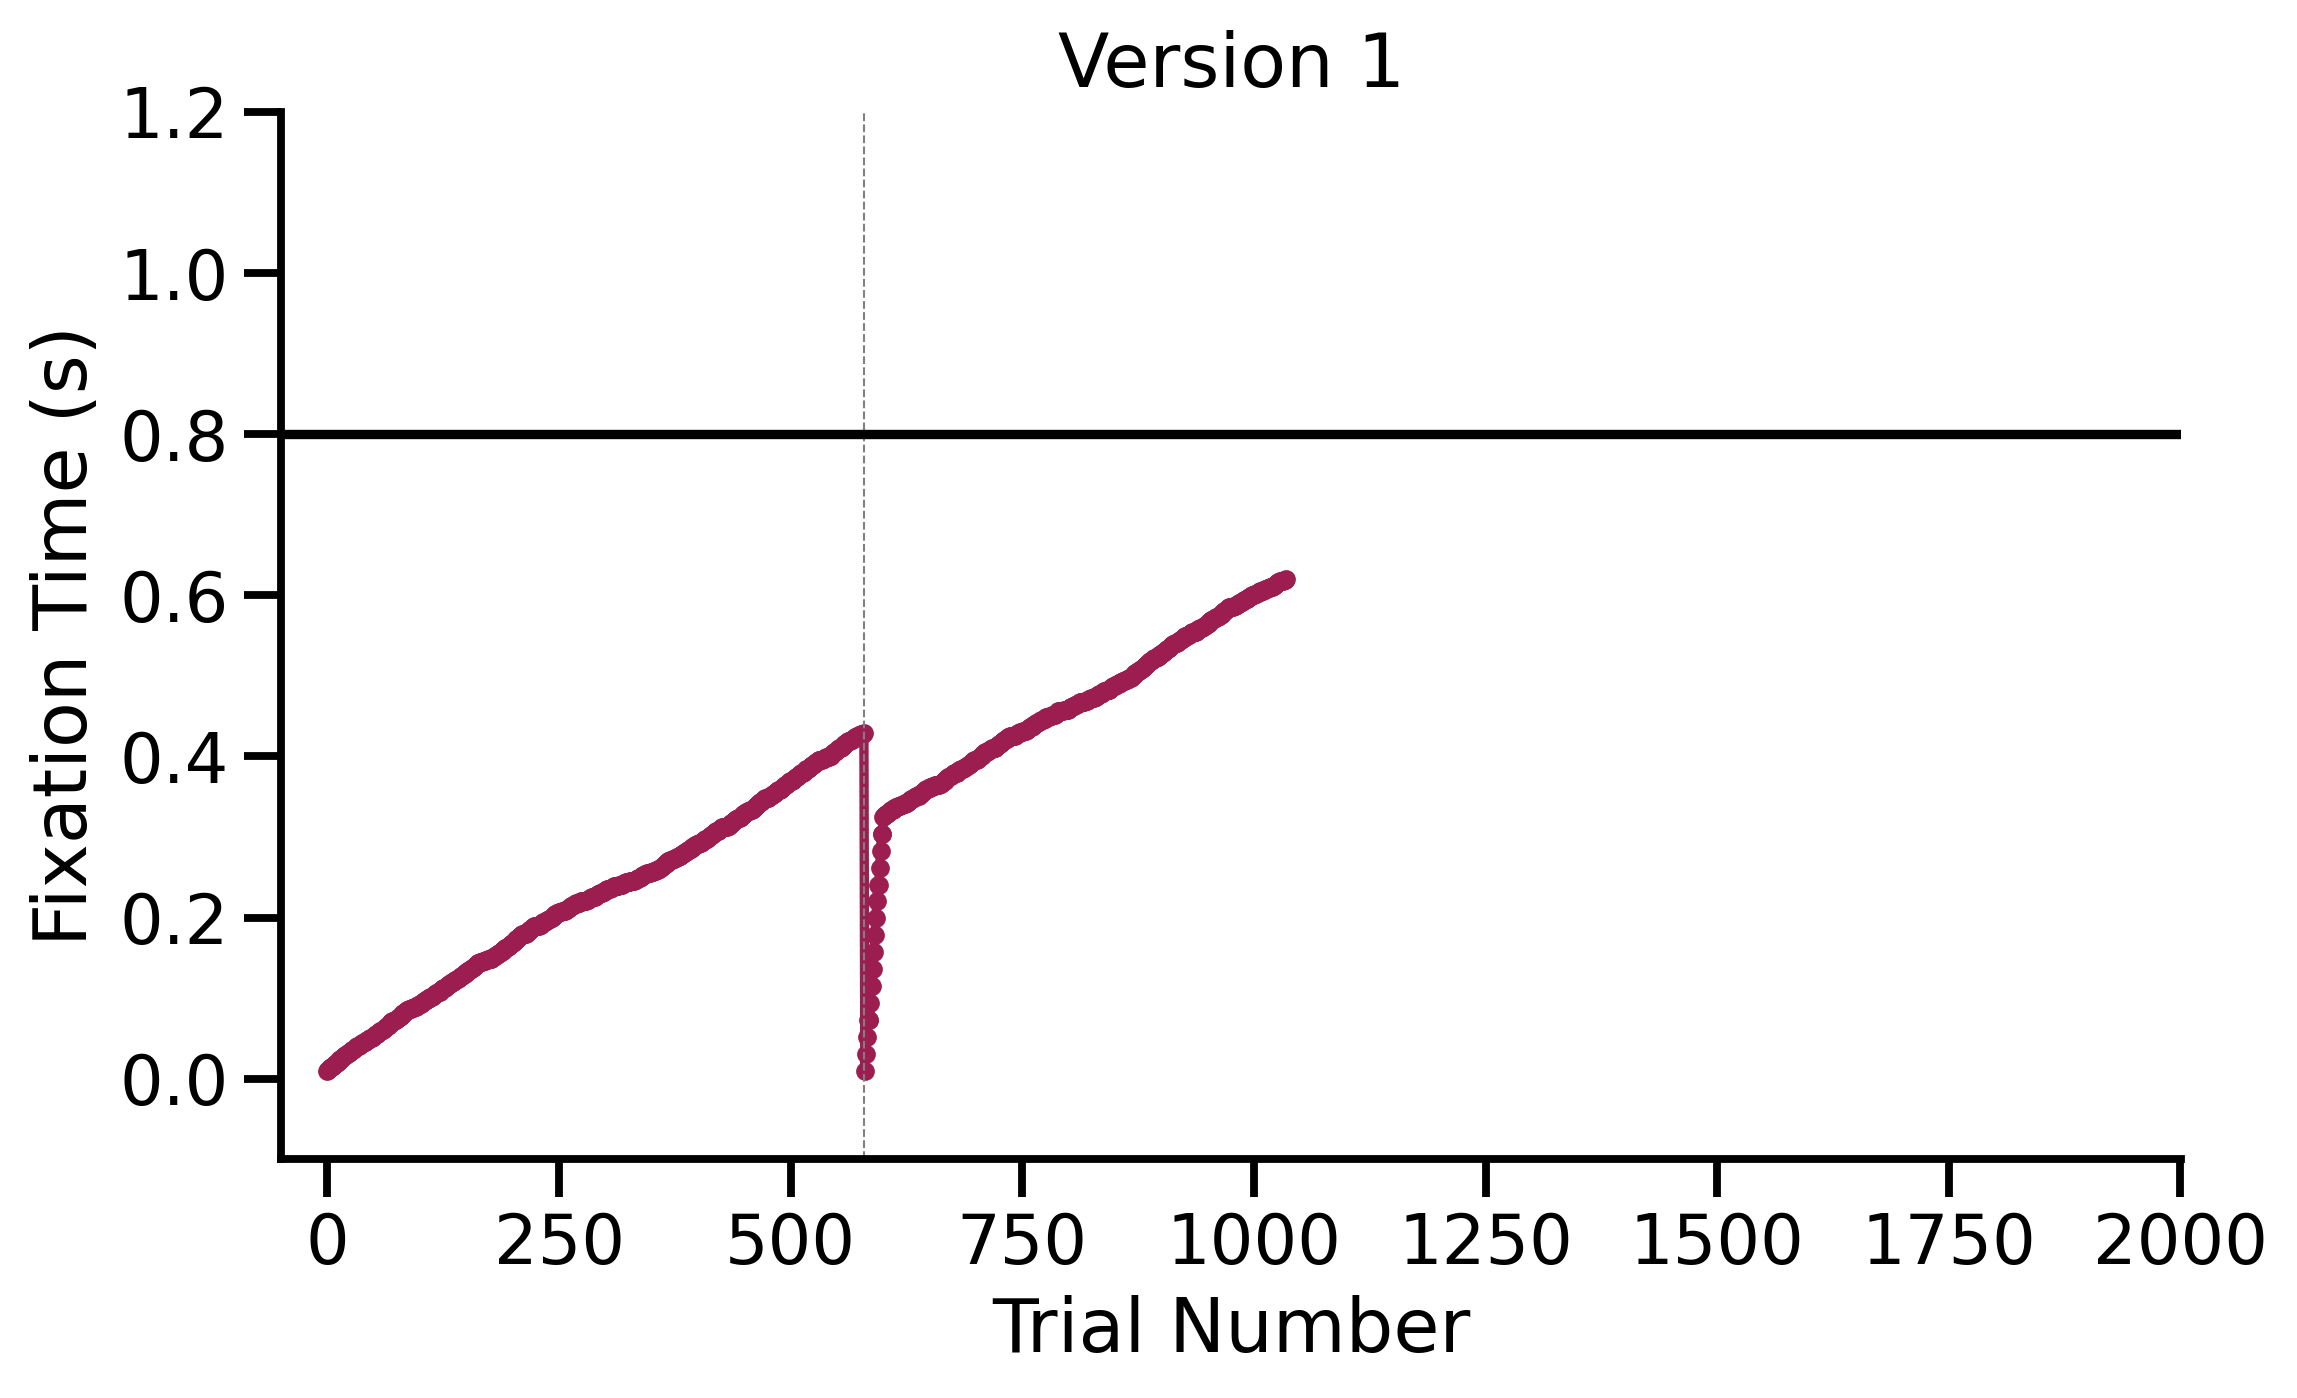

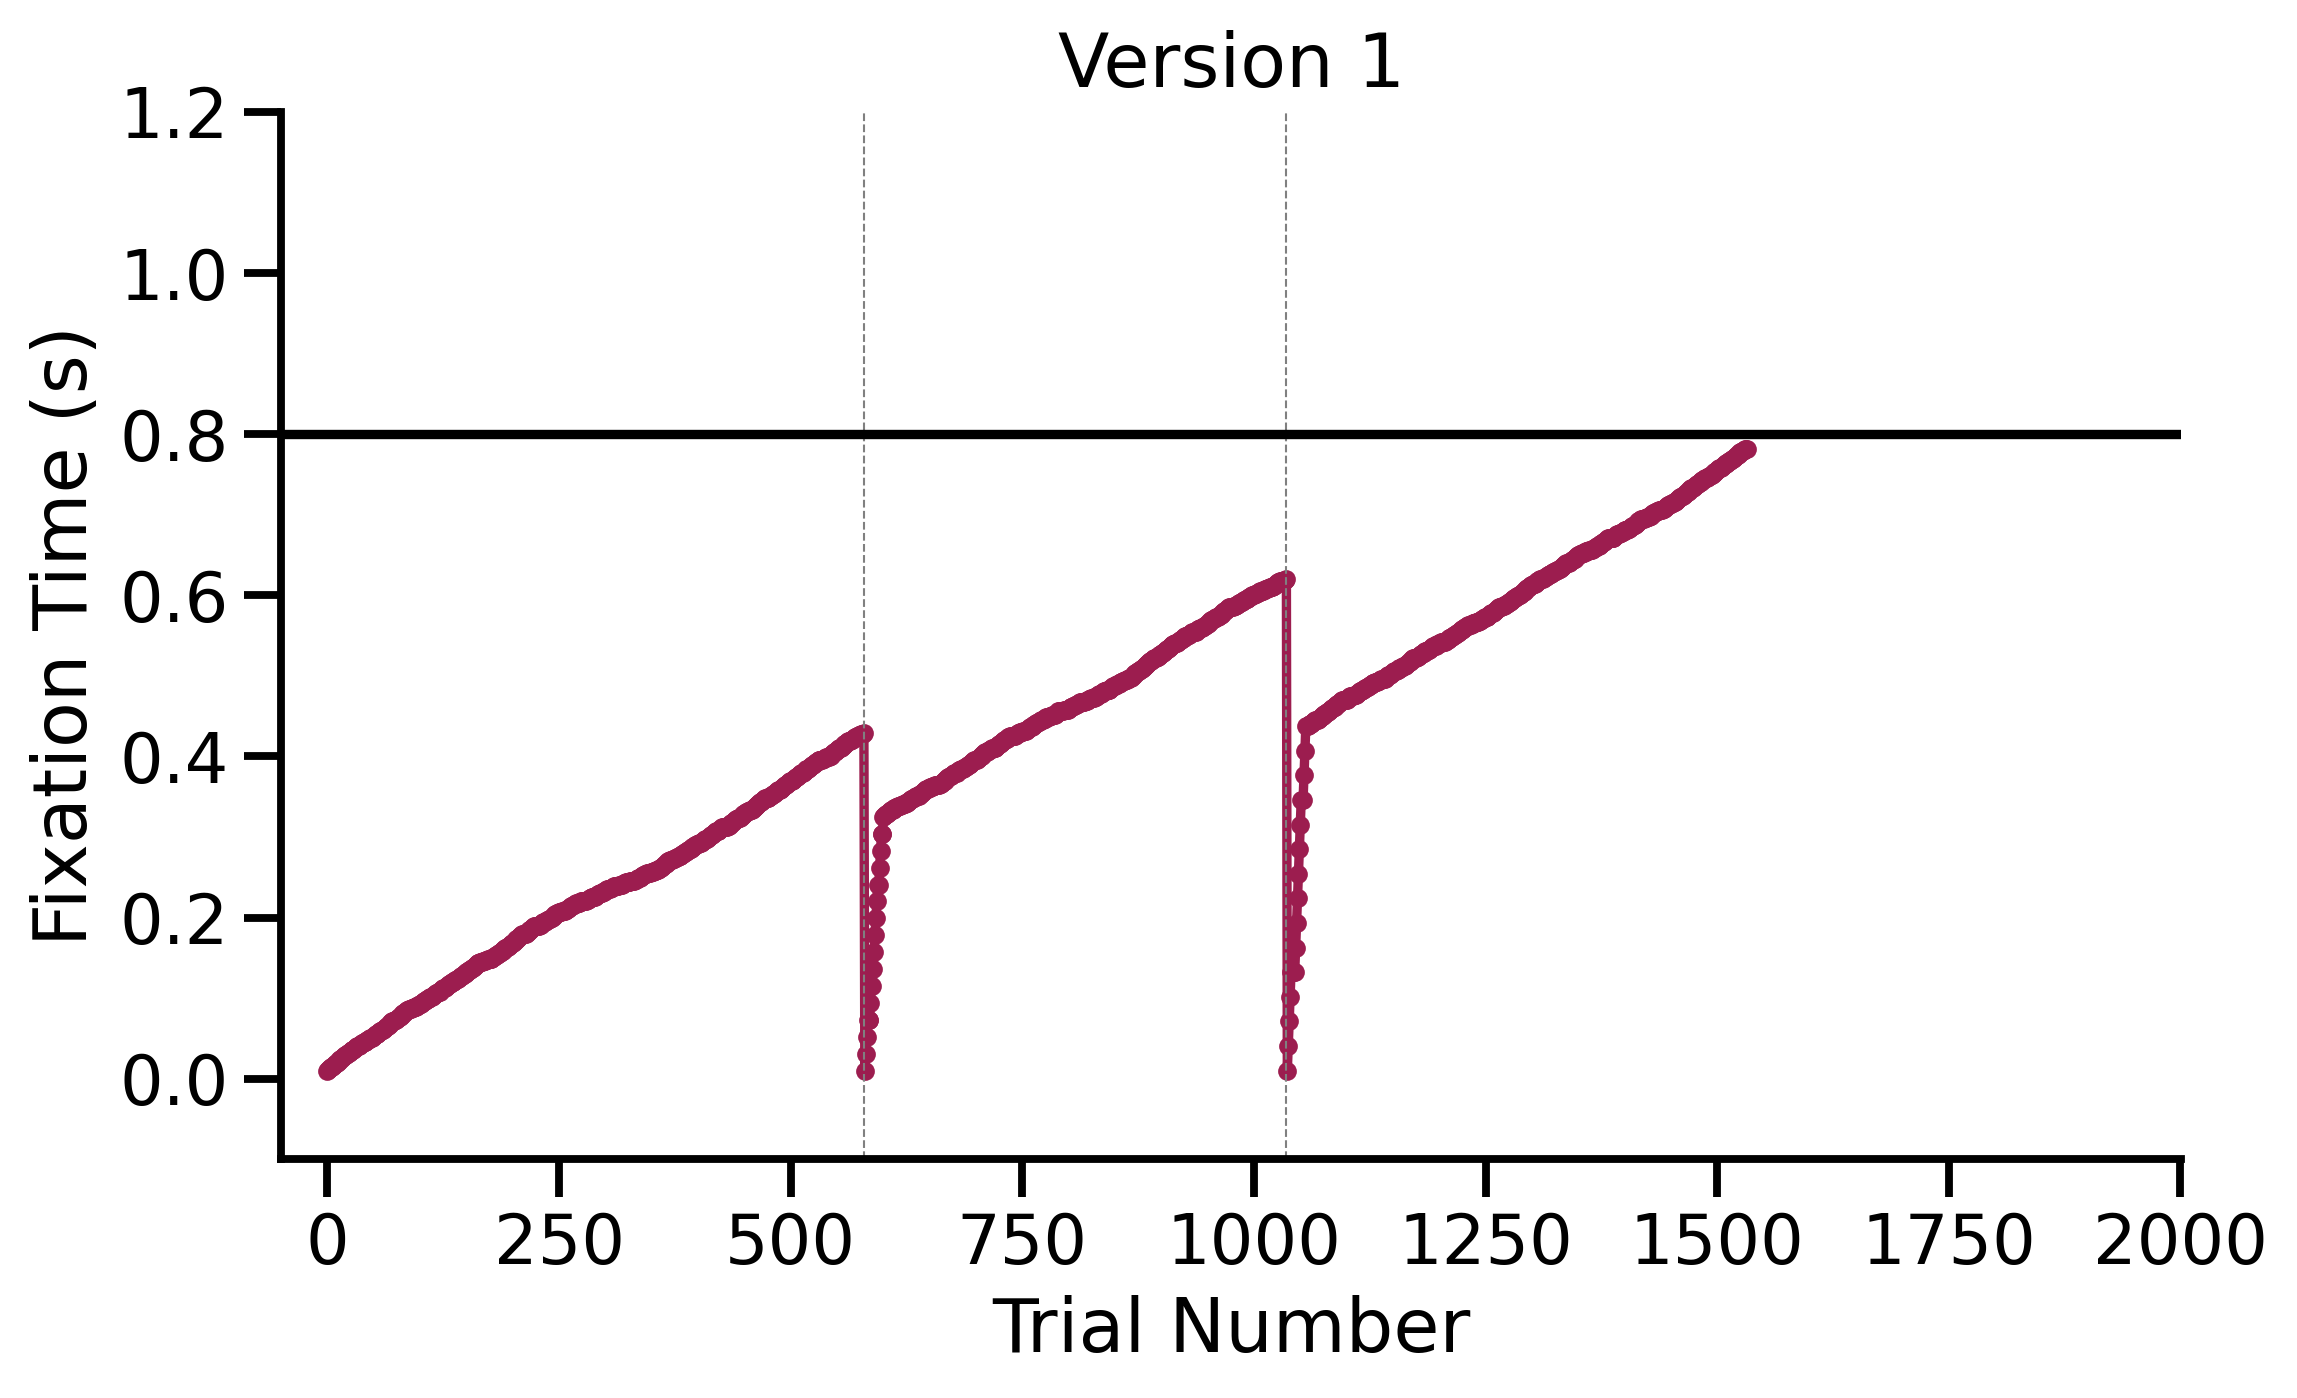

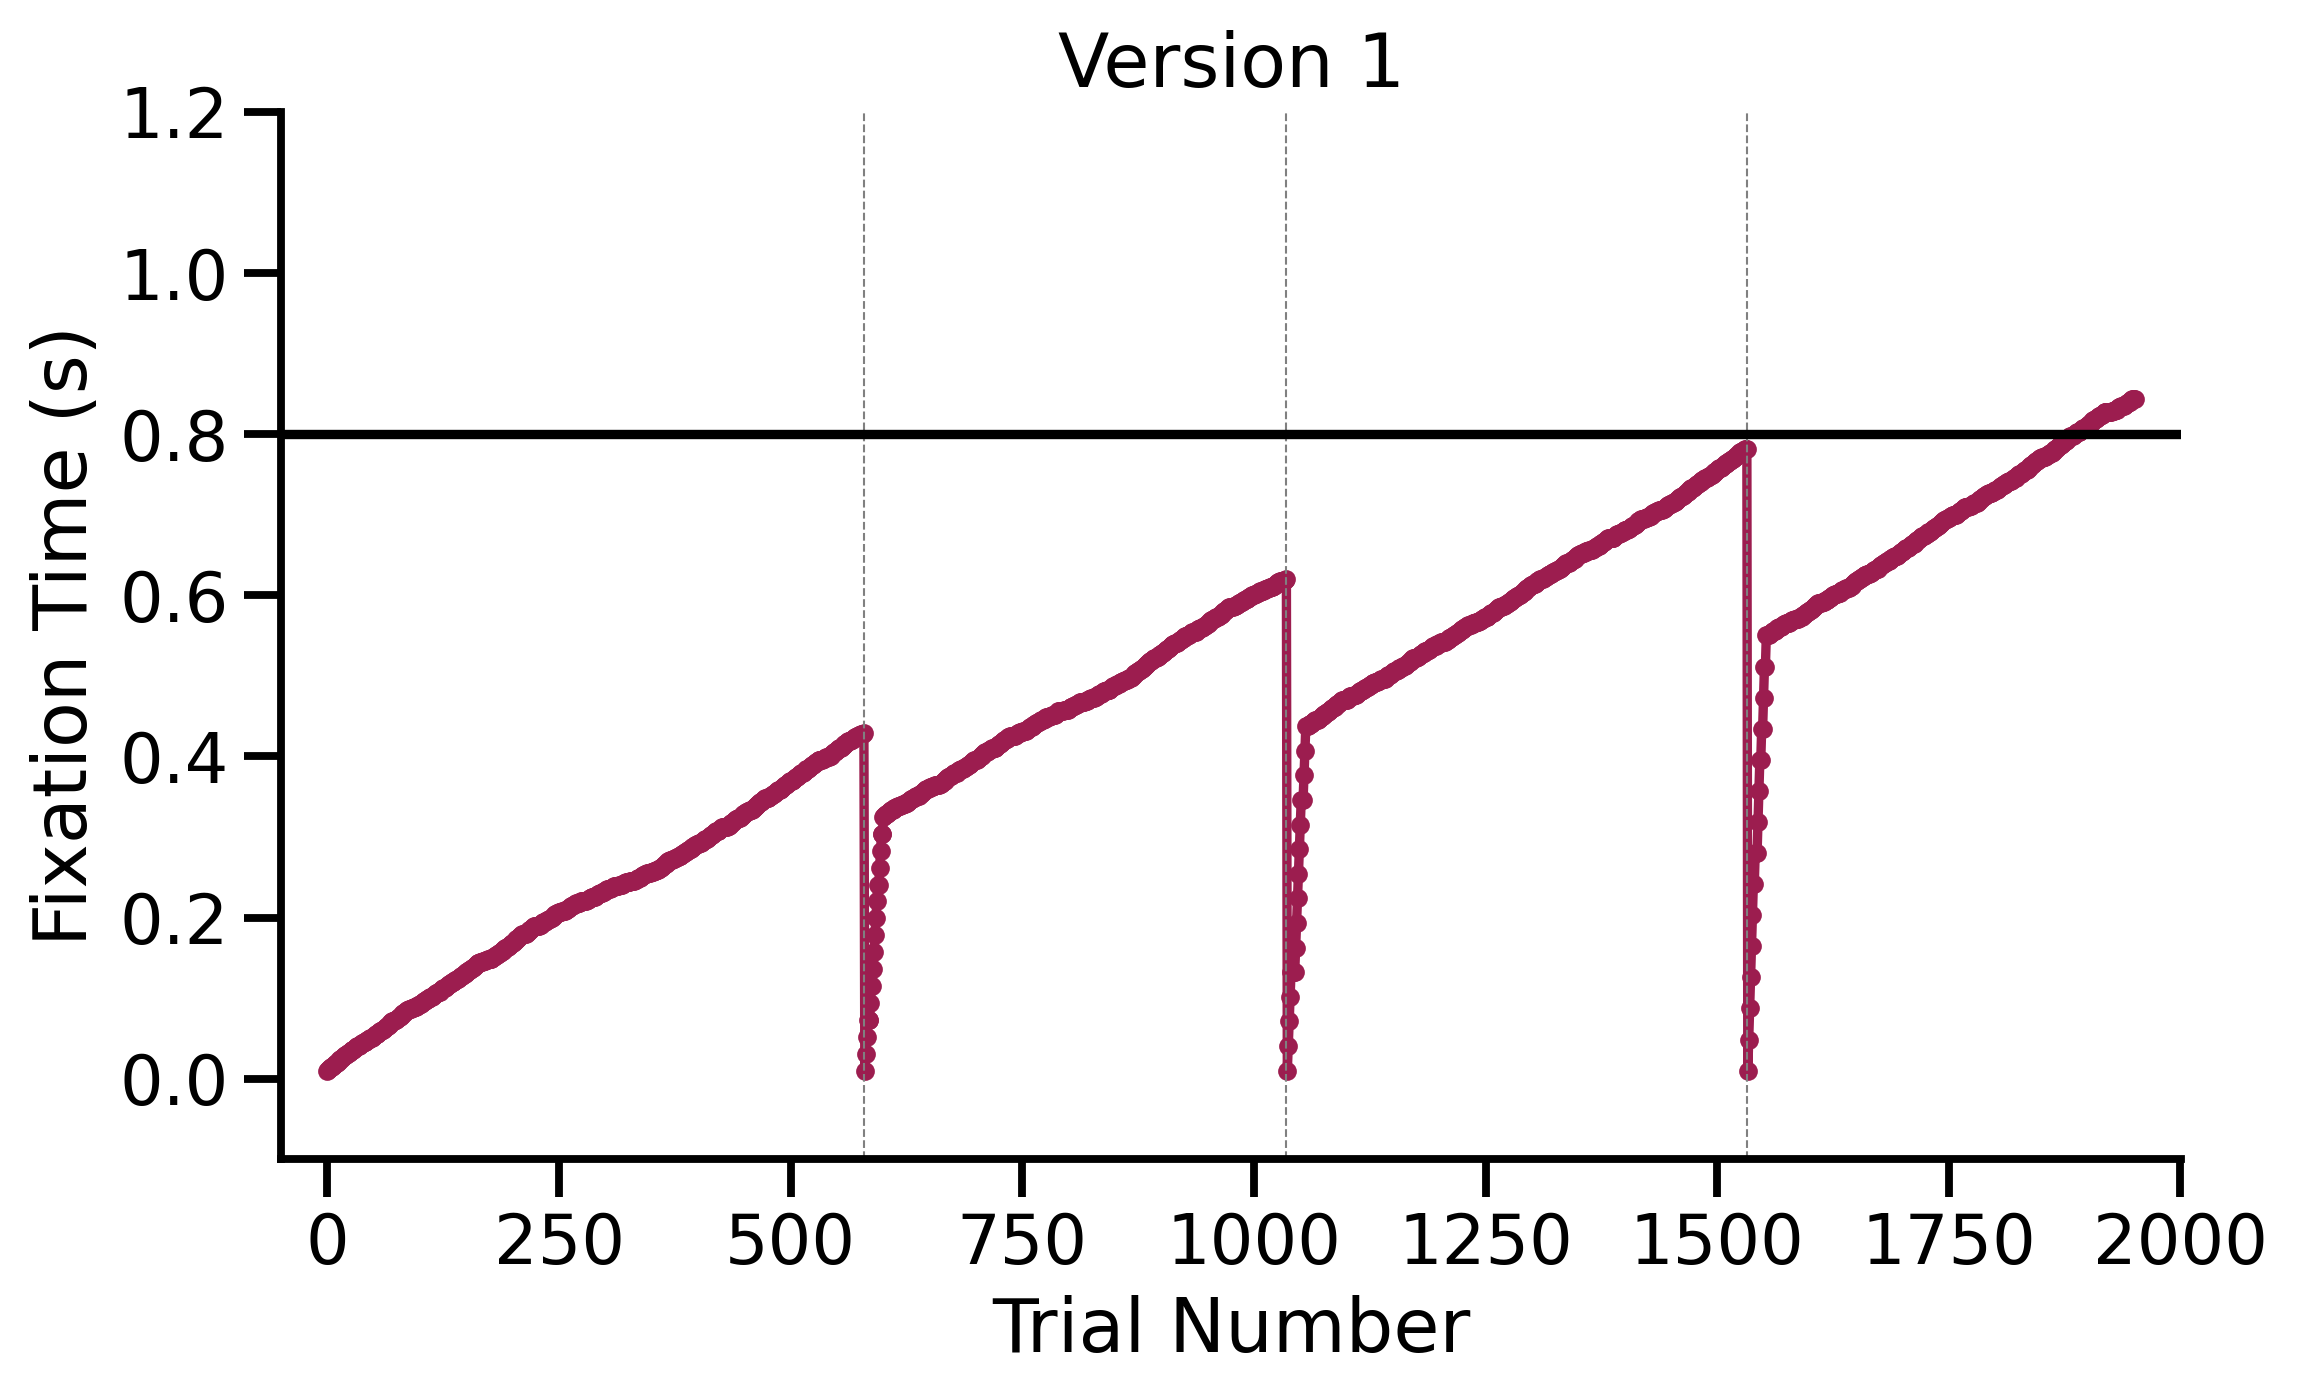

In [162]:
subplot_df = plot_df.copy()
# Define the common x and y limits for all plots
x_limits = (-50, subplot_df["total_trials"].max() + 50)
y_limits = (-0.1, 1.2)
session_starts = (subplot_df.groupby("sess_id")["total_trials"].min() - 1).to_list()
color = pu.ALPHA_V1_color


# Create a list to hold figures and axes
figs_axes = []

# Create four figures and axes, and add them to the list
for i in range(4):
    fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    figs_axes.append((fig, ax))

# Plot data on each axis
sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 == 0"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[0][1],  # Use the first axis
)

sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 <= 1"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[1][1],  # Use the second axis
)
figs_axes[1][1].axvline(session_starts[1], color="gray", linestyle="--", lw=0.5)

sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 <= 2"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[2][1],  # Use the third axis
)
figs_axes[2][1].axvline(session_starts[1], color="gray", linestyle="--", lw=0.5)
figs_axes[2][1].axvline(session_starts[2], color="gray", linestyle="--", lw=0.5)

sns.lineplot(
    data=subplot_df,
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[3][1],  # Use the fourth axis
)

for session_start in session_starts:
    if session_start > 0:
        figs_axes[3][1].axvline(x=session_start, color="gray", linestyle="--", lw=0.5)

# Apply common settings across all axes using an iterator
for fig, ax in figs_axes:
    ax.set(xlabel="Trial Number", ylabel="Fixation Time (s)", title="Version 1")
    ax.axhline(0.8, color="black")
    sns.despine(ax=ax)  # Apply sns.despine() to each axis
    fig.tight_layout()

# Show or save the plots
plt.show()

## 2. V2

### 2.1 Load in V2 data


In [143]:
animal = "R043"

tdf2 = ingest.create_trials_df.create_trials_df_from_dj([animal], date_min="2024-07-30")

animal_id R043
Fetched 27 dates from Sessions table from 2024-07-30 to 2024-08-24 for R043



In [144]:
tdf2 = viz.df_preperation.compute_days_relative_to_stage(
    tdf2.query("stage <=7").copy(), stage=5
)
tdf2["total_trials"] = range(len(tdf2))

### 2.2 Plotting the delay over time

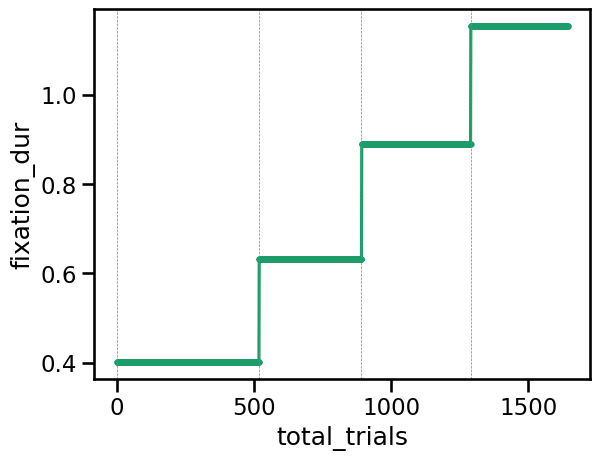

In [147]:
plot_df2 = tdf2.query("days_relative_to_stage_5 <4")
sns.lineplot(
    data=plot_df2,
    x="total_trials",
    y="fixation_dur",
    color=pu.ALPHA_V2_color,
    marker=".",
    markeredgecolor="none",
)

# Find the unique session start points
session_starts = plot_df2.groupby("sess_id")["total_trials"].min() - 1


# Plot a vertical line at the start of each new session
for session_start in session_starts:
    plt.axvline(x=session_start, color="gray", linestyle="--", lw=0.5)

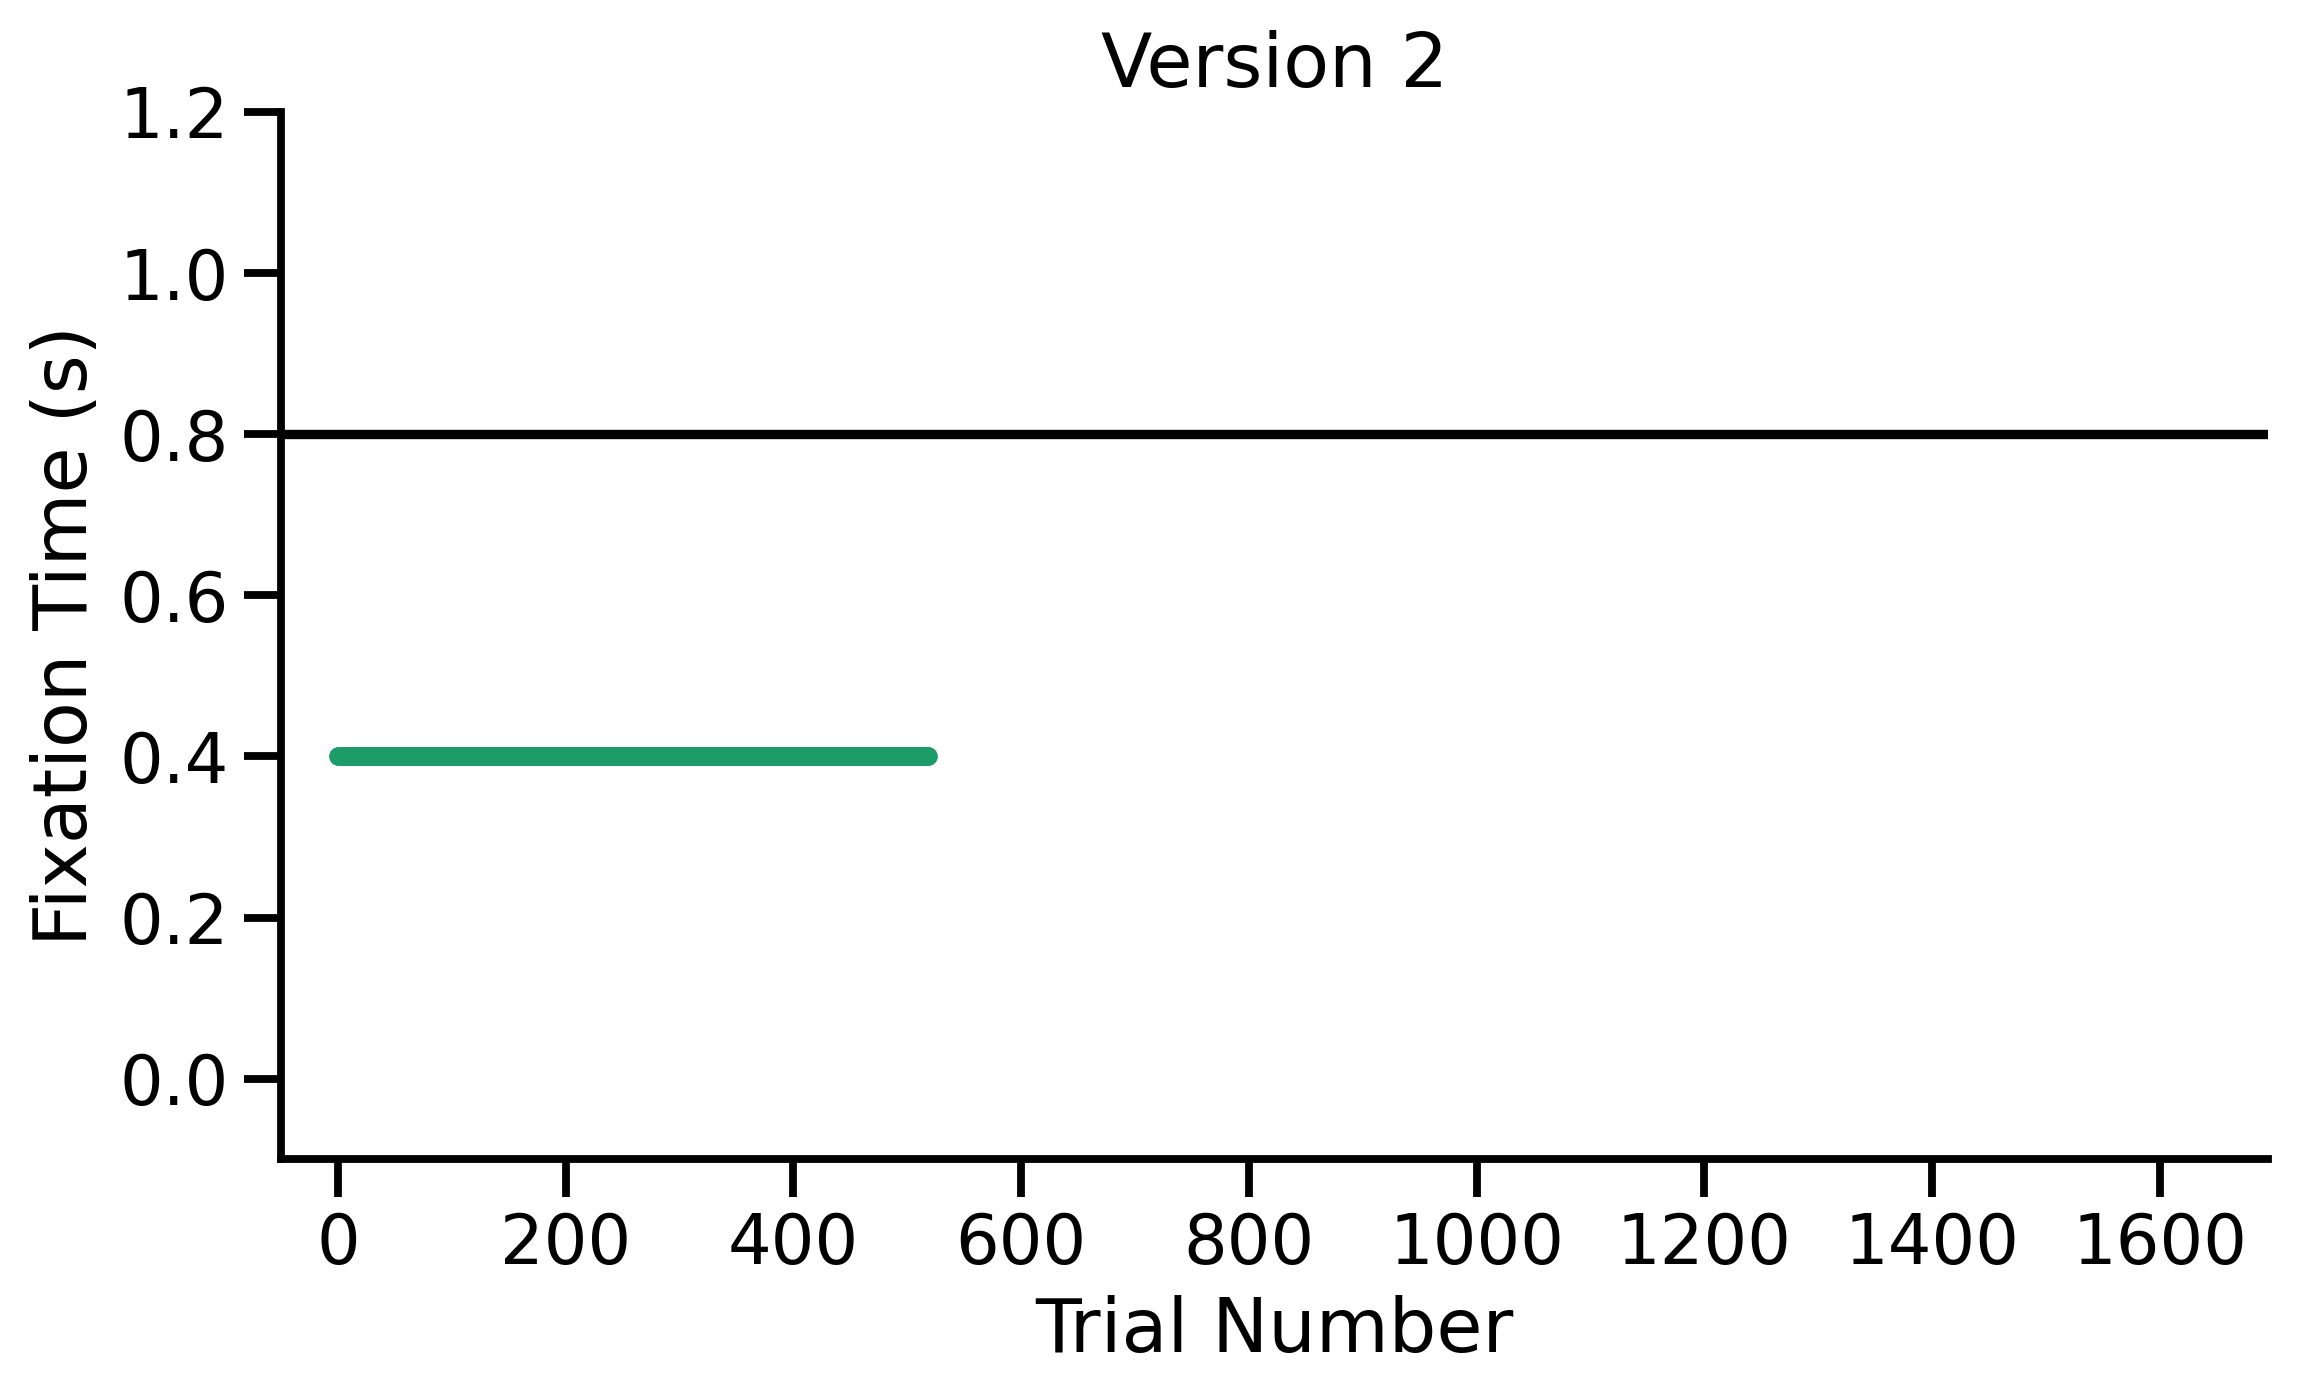

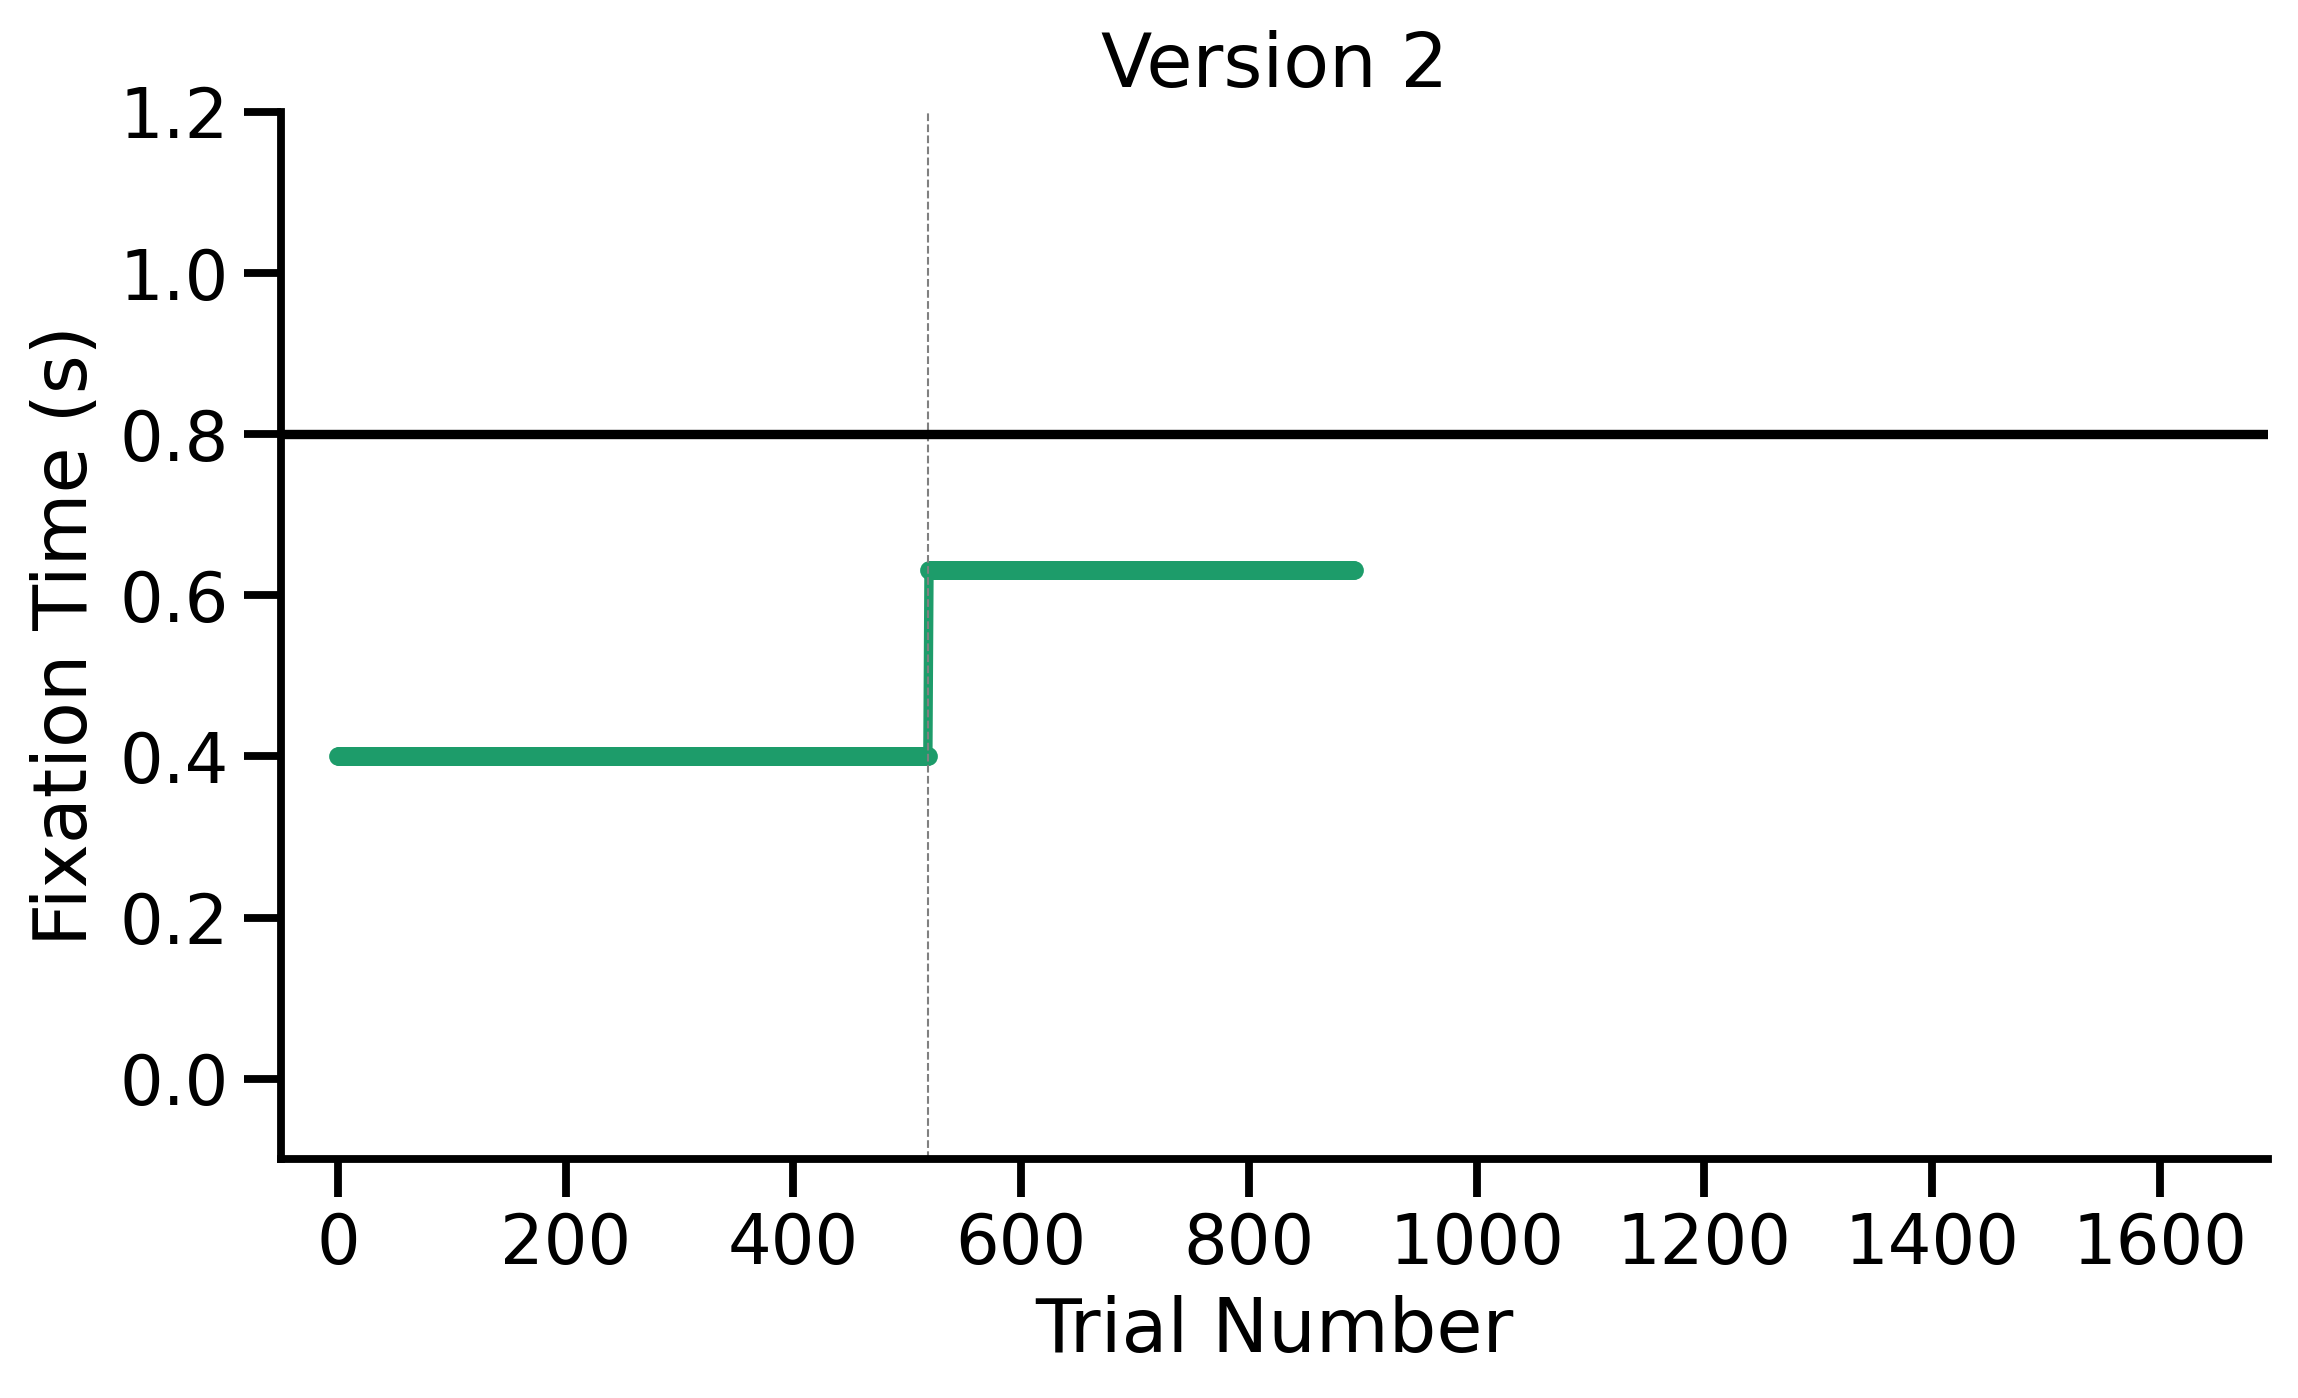

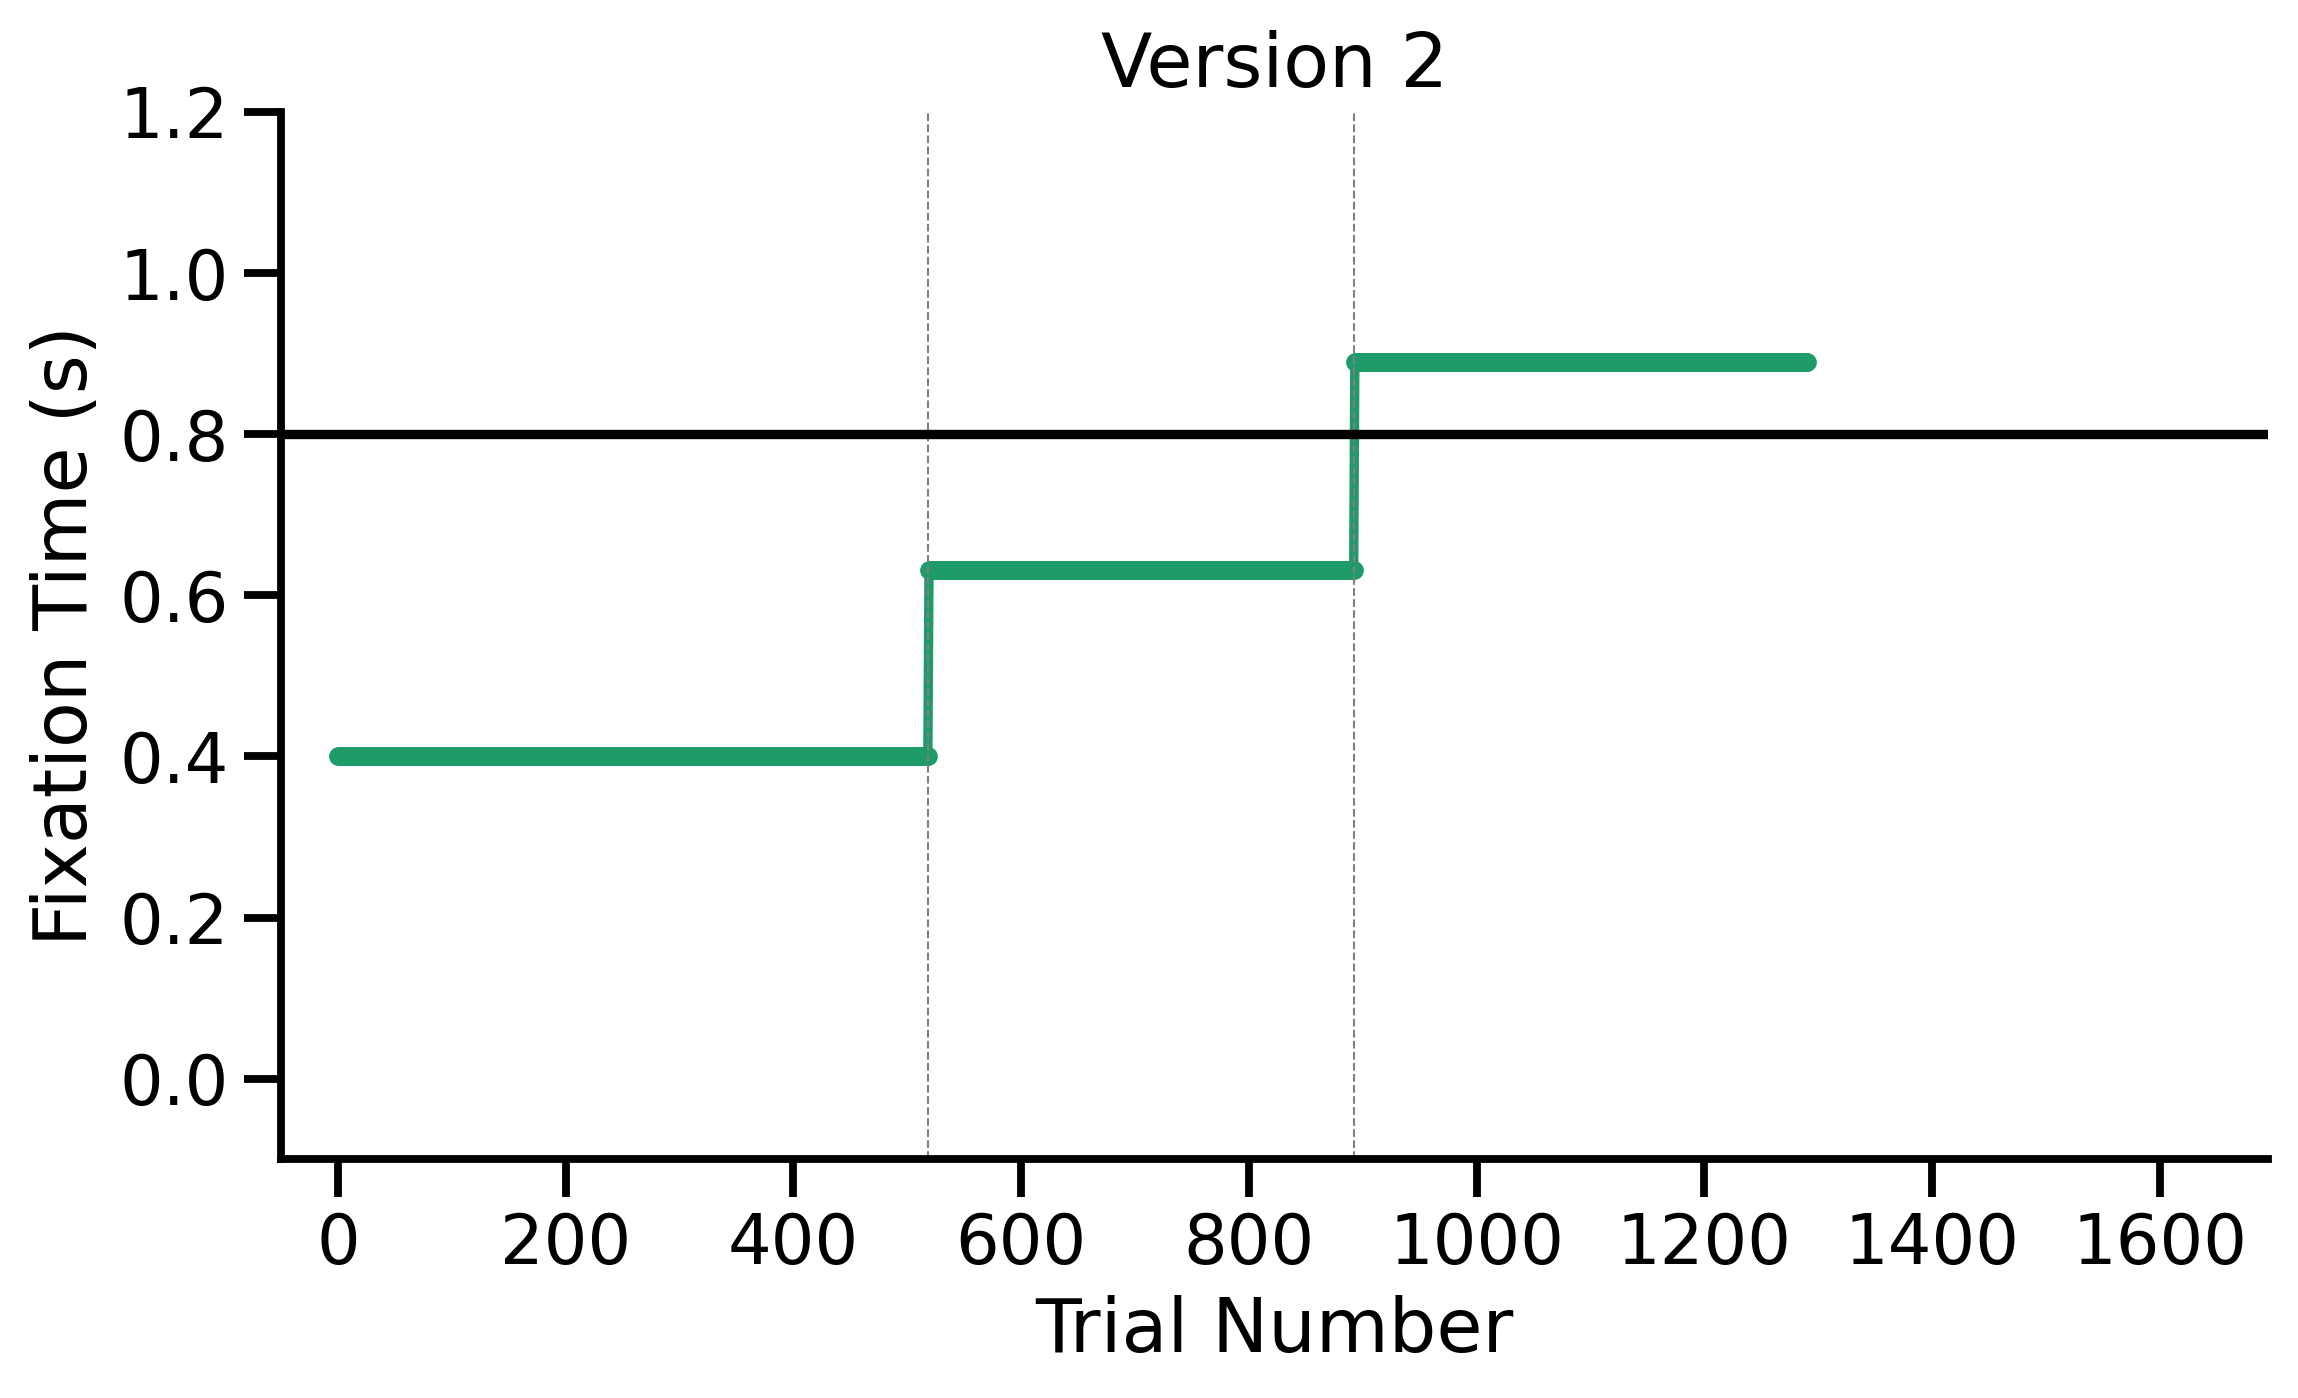

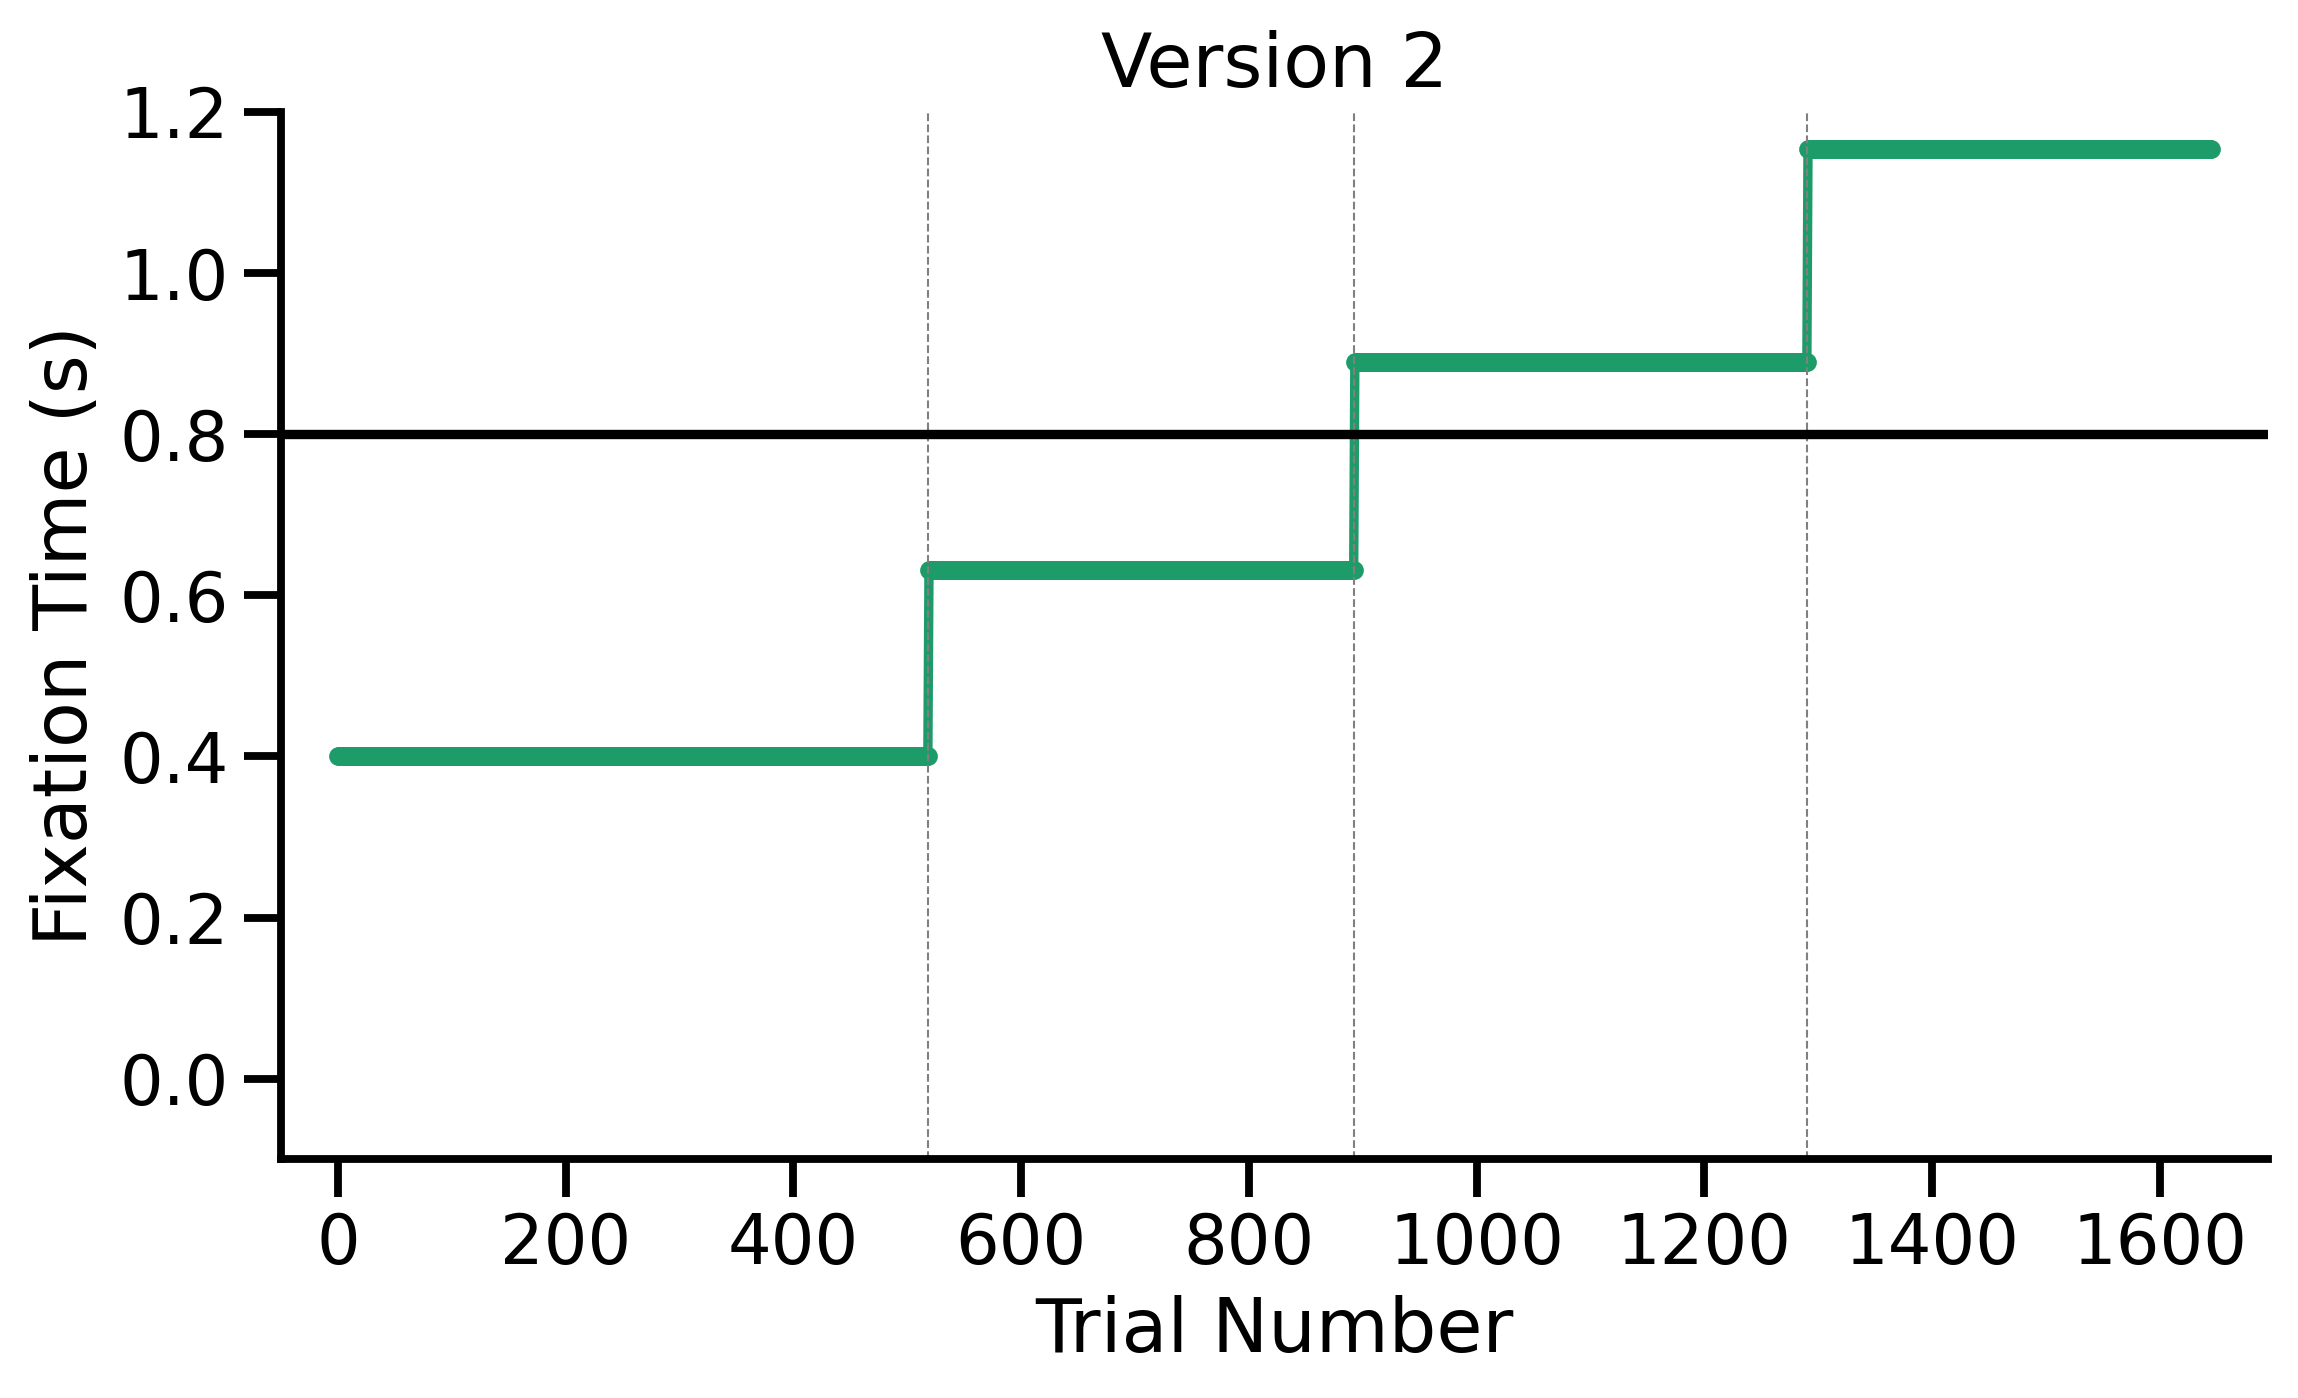

In [163]:
# Define the common x and y limits for all plots
x_limits = (-50, plot_df2["total_trials"].max() + 50)
y_limits = (-0.1, 1.2)
session_starts = (plot_df2.groupby("sess_id")["total_trials"].min() - 1).to_list()
color = pu.ALPHA_V2_color

subplot_df = plot_df2.copy()

# Create a list to hold figures and axes
figs_axes = []

# Create four figures and axes, and add them to the list
for i in range(4):
    fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    figs_axes.append((fig, ax))

# Plot data on each axis
sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 == 0"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[0][1],  # Use the first axis
)

sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 <= 1"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[1][1],  # Use the second axis
)
figs_axes[1][1].axvline(session_starts[1], color="gray", linestyle="--", lw=0.5)

sns.lineplot(
    data=subplot_df.query("days_relative_to_stage_5 <= 2"),
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[2][1],  # Use the third axis
)
figs_axes[2][1].axvline(session_starts[1], color="gray", linestyle="--", lw=0.5)
figs_axes[2][1].axvline(session_starts[2], color="gray", linestyle="--", lw=0.5)

sns.lineplot(
    data=subplot_df,
    x="total_trials",
    y="fixation_dur",
    color=color,
    marker=".",
    markeredgecolor="none",
    ax=figs_axes[3][1],  # Use the fourth axis
)

for session_start in session_starts:
    if session_start > 0:
        figs_axes[3][1].axvline(x=session_start, color="gray", linestyle="--", lw=0.5)

# Apply common settings across all axes using an iterator
for fig, ax in figs_axes:
    ax.set(xlabel="Trial Number", ylabel="Fixation Time (s)", title="Version 2")
    ax.axhline(0.8, color="black")
    sns.despine(ax=ax)  # Apply sns.despine() to each axis
    fig.tight_layout()

# Show or save the plots
plt.show()